<a href="https://colab.research.google.com/github/avisinghal6/Gradient_Descent_Variations/blob/main/Gradient_And_GradientFreeOpt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

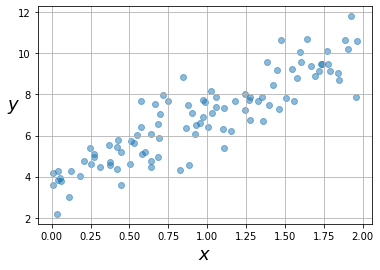

(100, 1) (100, 1)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from random import *
import random
X = 2 * np.random.rand(100,1)
y = 4 +3 * X+np.random.randn(100,1)

# mean center
# X -= np.average(X, axis=0)
# y -= np.average(y, axis=0)
# # putting in a ball of 1
# sx = np.max(abs(X),axis = 0)
# sy = np.max(abs(y))
# X /= sx
# y /= sy

plt.figure()
plt.scatter(X,y, alpha =0.5)
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.grid()
plt.show()

print (X.shape, y.shape)

In [10]:
from matplotlib.axis import YTick
'''
X    = Matrix of X with added bias units
y    = Vector of Y
theta=Vector of thetas np.random.randn(j,1)
learning_rate 
iterations = no of iterations

Returns the final theta vector and array of cost history over no of iterations
'''
    
def MSE(theta,X,y):    
    predictions = X.dot(theta)
    cost = (1/2*len(y)) * np.sum(np.square(predictions-y))
    return cost

def loss(theta,X,y):    
    predictions = X.dot(theta)
    loss = np.sum(np.square(predictions-y))
    return loss
    

def getGradient(X,y,theta):
    prediction = np.dot(X,theta)
    gradient = X.T.dot((prediction - y))
    
    return gradient
    
def getDirection(X,y,theta, sigma=0.4):
    out = np.zeros_like(theta)
    d = theta.shape[0]
    directions = np.random.normal(size = (8,d)) # random 8 direction
    
    fx = loss(theta,X,y)
    for di in directions:
        di = np.array([di]).T
        fxnew = loss(theta+ sigma*di,X,y)
        out += (1.0/8*sigma) * np.sum(fxnew-fx)*di
        
    return out # direction to move
    

def zeroOrder_descent(X,y,theta,learning_rate=0.01,iterations=100):
    
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        # getDirection will give direction without calculating gradient
        direction = getDirection(X,y,theta)
        theta = theta -(1/m)*learning_rate*(direction)
        theta_history[it,:] =theta.T
        cost_history[it]  = MSE(theta,X,y)
        
    return theta, cost_history, theta_history
        
    
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):

    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        gradient = getGradient(X,y,theta)
        theta = theta -(1/m)*learning_rate*(gradient)
        theta_history[it,:] =theta.T
        cost_history[it]  = MSE(theta,X,y)
        
    return theta, cost_history, theta_history

def SGD(X,y,theta,learning_rate=0.01,iterations=100):

    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    shuffle_data=list(range(0,m))
    it=0;
    epoch=(int)(iterations/m)
    for e in range(epoch):
      random.shuffle(shuffle_data)
      for idx in shuffle_data:
        gradient = getGradient(X[idx][np.newaxis,:],y[idx][np.newaxis,:],theta)
        theta = theta -learning_rate*(gradient)
        theta_history[it,:] =theta.T
        cost_history[it]  = MSE(theta,X,y)
        it+=1

        
    return theta, cost_history, theta_history

def ASGD(X,y,theta,learning_rate=0.01,iterations=100):

    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    mean_theta=0
    shuffle_data=list(range(0,m))

    it=0;
    epoch=(int)(iterations/m)
    for e in range(epoch):
      random.shuffle(shuffle_data)
      for idx in shuffle_data:
        gradient = getGradient(X[idx][np.newaxis,:],y[idx][np.newaxis,:],theta)
        theta = theta -learning_rate*(gradient)
        mean_theta=mean_theta+theta
        #updating theta by using mean_theta and dividing by the number of iterations
        theta=mean_theta/(it+1)
        theta_history[it,:] =theta.T
        cost_history[it]  = MSE(theta,X,y)
        it+=1
        
    return theta, cost_history, theta_history

def ADAM(X,y,theta,learning_rate=0.01,iterations=100):

    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    m_t=np.zeros(theta.shape)
    v_t=np.zeros(theta.shape)
    beta_1=0.9
    beta_2=0.999
    shuffle_data=list(range(0,m))

    it=0;
    epoch=(int)(iterations/len(X))
    for e in range(epoch):
      random.shuffle(shuffle_data)
      for idx in shuffle_data:
        gradient = getGradient(X[idx][np.newaxis,:],y[idx][np.newaxis,:],theta)
        m_t=beta_1*m_t+(1-beta_1)*gradient
        v_t=beta_2*v_t+(1-beta_2)*gradient**2
        m_hat=m_t/(1-beta_1**(it+1))
        v_hat=v_t/(1-beta_2**(it+1))
        theta = theta -learning_rate*(m_hat)*(1/(np.sqrt(v_hat)+1e-8))
        theta_history[it,:] =theta.T
        cost_history[it]  = MSE(theta,X,y)
        it+=1


        
    return theta, cost_history, theta_history

def ADAMAX(X,y,theta,learning_rate=0.01,iterations=100):

    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    m_t=np.zeros(theta.shape)
    v_t=np.zeros(theta.shape)
    beta_1=0.9
    beta_2=0.999
    shuffle_data=list(range(0,m))
    it=0;
    epoch=(int)(iterations/m)
    for e in range(epoch):
      random.shuffle(shuffle_data)
      for idx in shuffle_data:
        gradient = getGradient(X[idx][np.newaxis,:],y[idx][np.newaxis,:],theta)
        m_t=beta_1*m_t+(1-beta_1)*gradient
        v_t[0][0]=max(beta_2*v_t[0][0],abs(gradient[0][0]))
        v_t[1][0]=max(beta_2*v_t[1][0],abs(gradient[1][0]))
        m_hat=m_t/(1-beta_1**(it+1))
        theta = theta -learning_rate*(m_hat)/(v_t)
        theta_history[it,:] =theta.T
        cost_history[it]  = MSE(theta,X,y)
        it+=1

        
    return theta, cost_history, theta_history


def AMSGRAD(X,y,theta,learning_rate=0.01,iterations=100):

    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    m_t=np.zeros(theta.shape)
    v_t=np.zeros(theta.shape)
    beta_1=0.9
    beta_2=0.999
    v_hat=np.zeros(theta.shape)
    shuffle_data=list(range(0,m))
    

    it=0;
    epoch=(int)(iterations/m)
    for e in range(epoch):
      random.shuffle(shuffle_data)
      for idx in shuffle_data:
        gradient = getGradient(X[idx][np.newaxis,:],y[idx][np.newaxis,:],theta)
        m_t=beta_1*m_t+(1-beta_1)*gradient
        v_t=beta_2*v_t+(1-beta_2)*gradient**2
        v_hat[0][0]=max(v_hat[0][0],v_t[0][0])
        v_hat[1][0]=max(v_hat[1][0],v_t[1][0])
        # m_hat=m_t/(1-beta_1**(it+1))
        theta = theta -learning_rate*(m_t)*(1/np.sqrt(v_hat)+1e-8)
        theta_history[it,:] =theta.T
        cost_history[it]  = MSE(theta,X,y)
        it+=1

        
    return theta, cost_history, theta_history


Theta:  [[4.23801806]
 [2.77209505]]
Final cost/MSE:  4725.507


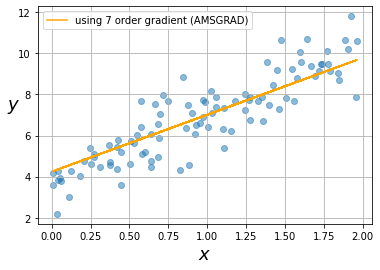

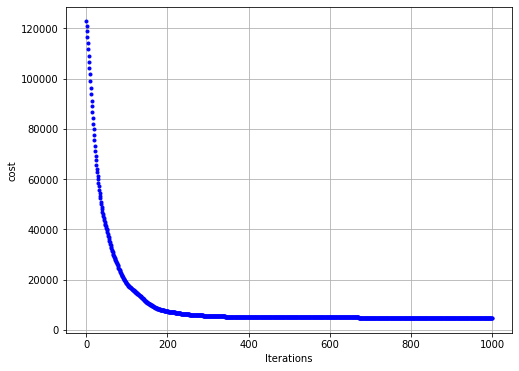

In [11]:
lr =0.005
n_iter = 1000
theta = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X),1)),X]

theta7,cost_history7,theta_history7 = AMSGRAD(X_b,y,theta,lr,n_iter)
print('Theta: ', theta7)
print('Final cost/MSE:  {:0.3f}'.format(cost_history7[-1]))

#plot theta
plt.figure()
plt.scatter(X,y, alpha =0.5)
predy = np.dot(X_b,theta7)
plt.plot(X,predy, "orange", label= "using 7 order gradient (AMSGRAD)")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.grid()
plt.legend()
plt.show()


fig,ax = plt.subplots(figsize=(8,6))

ax.set_ylabel('cost')
ax.set_xlabel('Iterations')
ax.grid()
_=ax.plot(range(n_iter),cost_history7,'b.')

Theta:  [[3.8996258 ]
 [2.99590993]]
Final cost/MSE:  4487.842


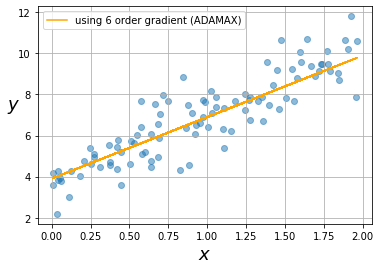

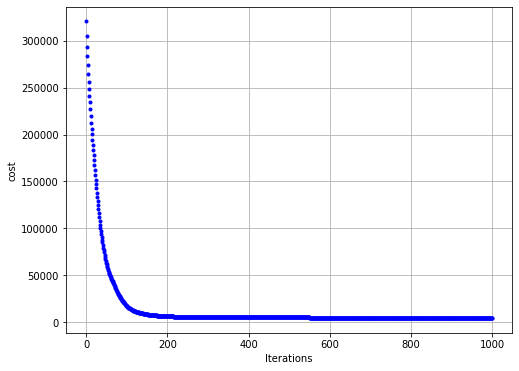

In [12]:
lr =0.1
n_iter = 1000
theta = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X),1)),X]

theta6,cost_history6,theta_history6 = ADAMAX(X_b,y,theta,lr,n_iter)
print('Theta: ', theta6)
print('Final cost/MSE:  {:0.3f}'.format(cost_history6[-1]))

#plot theta
plt.figure()
plt.scatter(X,y, alpha =0.5)
predy = np.dot(X_b,theta6)
plt.plot(X,predy, "orange", label= "using 6 order gradient (ADAMAX)")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.grid()
plt.legend()
plt.show()


fig,ax = plt.subplots(figsize=(8,6))

ax.set_ylabel('cost')
ax.set_xlabel('Iterations')
ax.grid()
_=ax.plot(range(n_iter),cost_history6,'b.')

Theta:  [[3.72215118]
 [3.25661199]]
Final cost/MSE:  4333.594


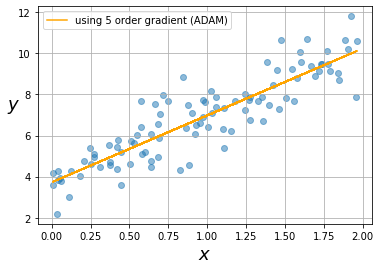

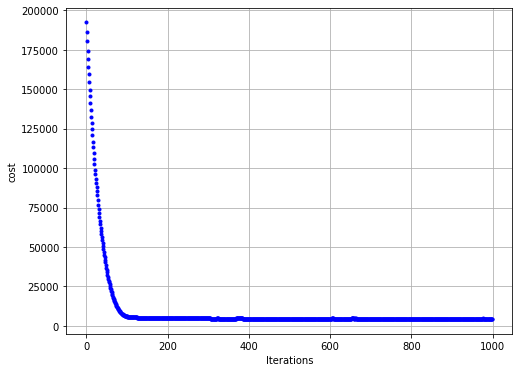

In [13]:
lr =0.05
n_iter = 1000
theta = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X),1)),X]

theta5,cost_history5,theta_history5 = ADAM(X_b,y,theta,lr,n_iter)
print('Theta: ', theta5)
print('Final cost/MSE:  {:0.3f}'.format(cost_history5[-1]))

#plot theta
plt.figure()
plt.scatter(X,y, alpha =0.5)
predy = np.dot(X_b,theta5)
plt.plot(X,predy, "orange", label= "using 5 order gradient (ADAM)")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.grid()
plt.legend()
plt.show()


fig,ax = plt.subplots(figsize=(8,6))

ax.set_ylabel('cost')
ax.set_xlabel('Iterations')
ax.grid()
_=ax.plot(range(n_iter),cost_history5,'b.')

Theta:  [[3.24277028]
 [2.55845421]]
Final cost/MSE:  11908.219


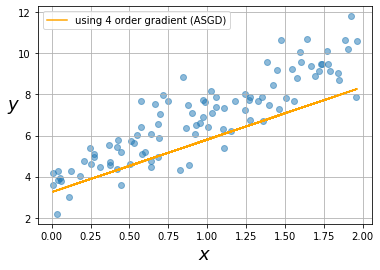

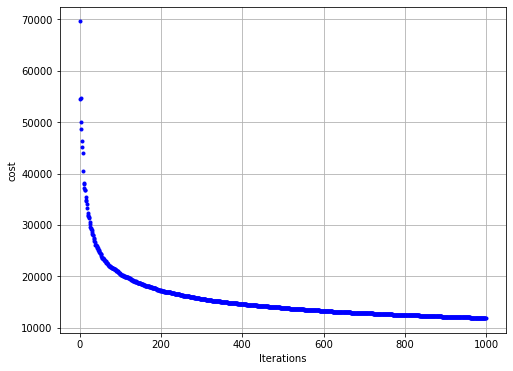

In [14]:
lr =0.08
n_iter = 1000
theta = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X),1)),X]

theta4,cost_history4,theta_history4 = ASGD(X_b,y,theta,lr,n_iter)
print('Theta: ', theta4)
print('Final cost/MSE:  {:0.3f}'.format(cost_history4[-1]))

#plot theta
plt.figure()
plt.scatter(X,y, alpha =0.5)
predy = np.dot(X_b,theta4)
plt.plot(X,predy, "orange", label= "using 4 order gradient (ASGD)")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.grid()
plt.legend()
plt.show()


fig,ax = plt.subplots(figsize=(8,6))

ax.set_ylabel('cost')
ax.set_xlabel('Iterations')
ax.grid()
_=ax.plot(range(n_iter),cost_history4,'b.')

Theta:  [[3.42564785]
 [3.56755381]]
Final cost/MSE:  4477.262


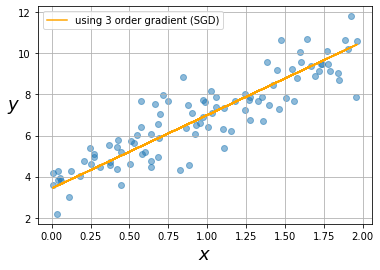

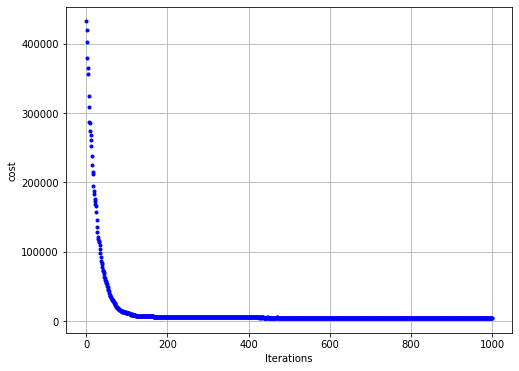

In [15]:
lr =0.01
n_iter = 1000
theta = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X),1)),X]

theta3,cost_history3,theta_history3 = SGD(X_b,y,theta,lr,n_iter)
print('Theta: ', theta3)
print('Final cost/MSE:  {:0.3f}'.format(cost_history3[-1]))

#plot theta
plt.figure()
plt.scatter(X,y, alpha =0.5)
predy = np.dot(X_b,theta3)
plt.plot(X,predy, "orange", label= "using 3 order gradient (SGD)")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.grid()
plt.legend()
plt.show()


fig,ax = plt.subplots(figsize=(8,6))

ax.set_ylabel('cost')
ax.set_xlabel('Iterations')
ax.grid()
_=ax.plot(range(n_iter),cost_history3,'b.')

Theta:  [[4.67701075]
 [2.44119649]]
Final cost/MSE:  5536.008


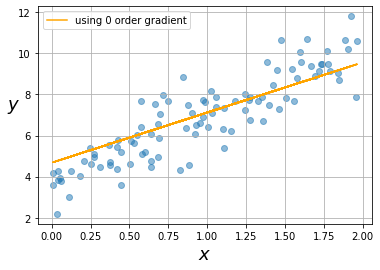

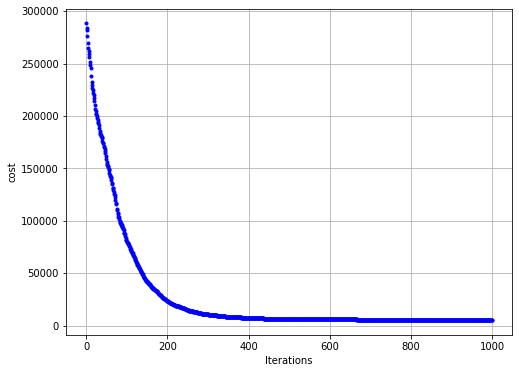

In [16]:
lr =0.01
n_iter = 1000
theta = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X),1)),X]
theta0,cost_history0,theta_history0 = zeroOrder_descent(X_b,y,theta,lr,n_iter)
print('Theta: ', theta0)
print('Final cost/MSE:  {:0.3f}'.format(cost_history0[-1]))

#plot theta
plt.figure()
plt.scatter(X,y, alpha =0.5)
predy = np.dot(X_b,theta0)
plt.plot(X,predy, "orange", label= "using 0 order gradient")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.grid()
plt.legend()
plt.show()


fig,ax = plt.subplots(figsize=(8,6))

ax.set_ylabel('cost')
ax.set_xlabel('Iterations')
ax.grid()
_=ax.plot(range(n_iter),cost_history0,'b.')

Theta:  [[3.85384842]
 [3.15692568]]
Final cost/MSE:  4352.665


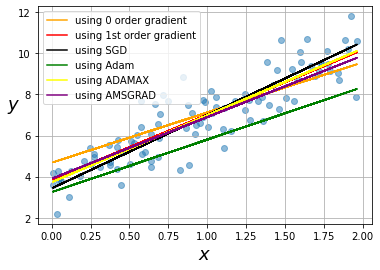

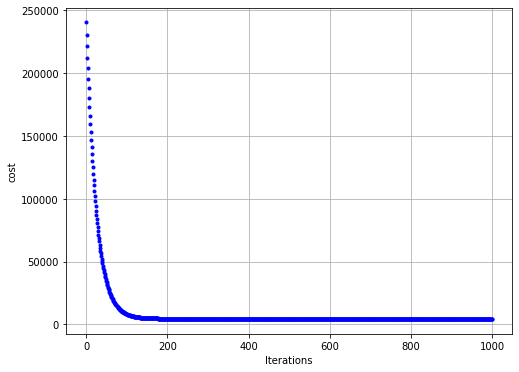

In [17]:
lr =0.01
n_iter = 1000
theta = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X),1)),X]

theta1,cost_history1,theta_history1 = gradient_descent(X_b,y,theta,lr,n_iter)

print('Theta: ', theta1)
print('Final cost/MSE:  {:0.3f}'.format(cost_history1[-1]))

#plot theta
# plt.figure()
plt.scatter(X,y, alpha =0.5)

# comment next 2 lines if not showing 0 order here
predy = np.dot(X_b,theta0)
plt.plot(X,predy, "orange", label= "using 0 order gradient")

predy = np.dot(X_b,theta1)
plt.plot(X,predy, "red", label= "using 1st order gradient")

predy = np.dot(X_b,theta3)
plt.plot(X,predy, "black", label= "using SGD")

predy = np.dot(X_b,theta4)
plt.plot(X,predy, "green", label= "using Adam")

predy = np.dot(X_b,theta5)
plt.plot(X,predy, "yellow", label= "using ADAMAX")

predy = np.dot(X_b,theta6)
plt.plot(X,predy, "purple", label= "using AMSGRAD")

plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.grid()
plt.legend()
plt.show()

fig,ax = plt.subplots(figsize=(8,6))

ax.set_ylabel('cost')
ax.set_xlabel('Iterations')
ax.grid()
_=ax.plot(range(n_iter),cost_history1,'b.')